In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df= pd.read_csv("train.csv")
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
len(df.index)

646

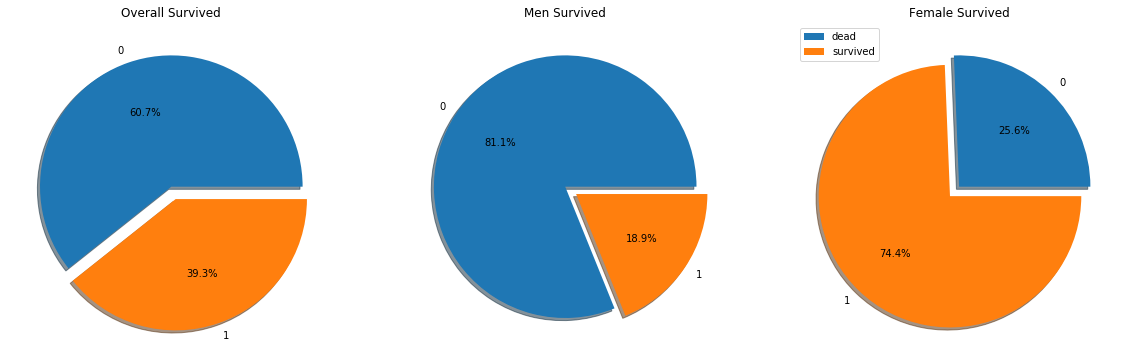

In [10]:
f,ax=plt.subplots(1,3,figsize=(20,10))

df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, ax=ax[0])
df['Survived'].loc[df['Sex']=='male'].value_counts(sort=False).plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, ax=ax[1])
df['Survived'].loc[df['Sex']=='female'].value_counts(sort=False).plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, ax=ax[2])
ax[0].set_title('Overall Survived')
ax[1].set_title('Men Survived')
ax[2].set_title('Female Survived')

ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

labels = ['dead', 'survived'] 
plt.legend(labels)

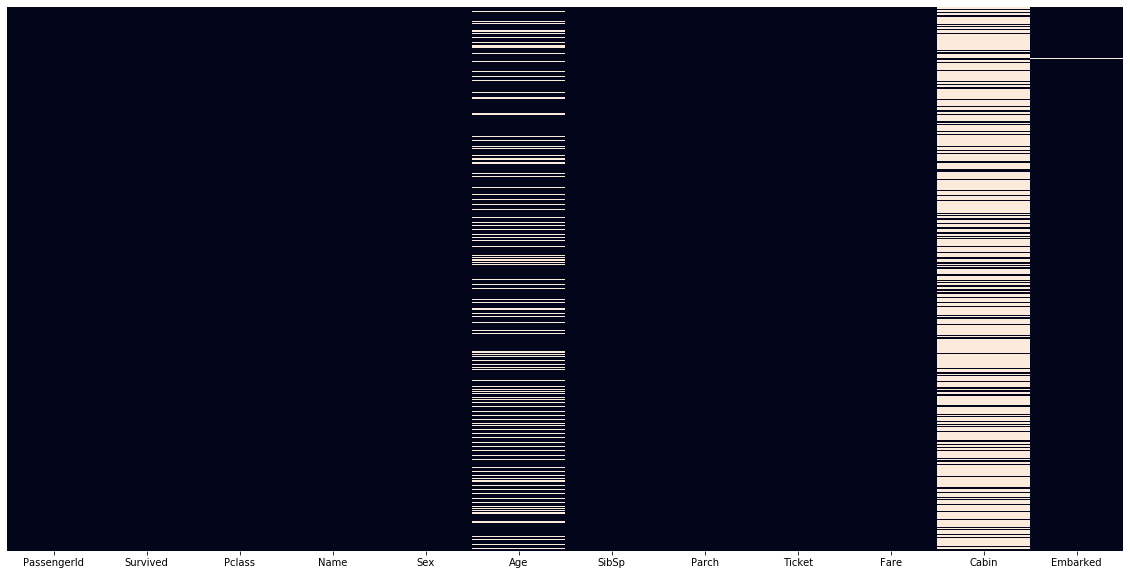

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [12]:
df.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            135
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          500
Embarked         1
dtype: int64

In [13]:
df.loc[df["Survived"] == 0,"Survived"] = -1
df.loc[df["Survived"] == 1,"Survived"] = 0
df.loc[df["Survived"] == -1,"Survived"] = 1

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
pd.crosstab(df.Sex,df.Survived).apply(lambda r: r/r.sum(), axis=1)

Survived,0,1
Sex,,
female,0.743697,0.256303
male,0.188725,0.811275


In [16]:
df.loc[df["Sex"] == "male","Sex"] = 1
df.loc[df["Sex"] == "female","Sex"] = 0
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,1,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df['Embarked'].value_counts() 

S    462
C    125
Q     58
Name: Embarked, dtype: int64

In [18]:
df['Embarked'] = df.Embarked.fillna('S')

In [19]:
pd.crosstab(df.Embarked,df.Survived).apply(lambda r: r/r.sum(), axis=1)

Survived,0,1
Embarked,,
C,0.544000,0.456000
Q,0.448276,0.551724
S,0.345572,0.654428


In [20]:
df['Embarked'] = df['Embarked'].map( {'S': 2, 'Q': 1, 'C': 0} ).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,1,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


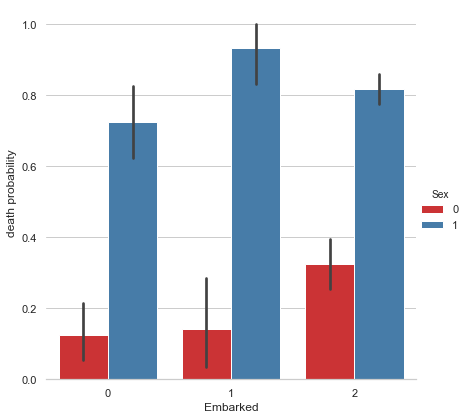

In [21]:
sns.set(style="whitegrid")

g = sns.catplot(x="Embarked", y="Survived", hue="Sex", data=df, height=6, kind="bar", palette="Set1")
g.despine(left=True)
g.set_ylabels("death probability")

In [22]:
#del df['Type']
df.loc[df["Name"].str.find('Mr.') >= 0, "Type"] = 4
df.loc[df["Name"].str.find('Mrs.') >= 0, "Type"] = 0
df.loc[df["Name"].str.find('Miss.') >= 0, "Type"] = 1
df.loc[df["Name"].str.find('Master.') >= 0, "Type"] = 2
df.loc[df["Name"].str.find('Don.') >= 0, "Type"] = 3
df.loc[df["Name"].str.find('Rev.') >= 0, "Type"] = 3
df.loc[df["Name"].str.find('Dr.') >= 0, "Type"] = 3
df['Type'] = df.Type.fillna(3)

In [23]:
pd.crosstab(df.Type,df.Survived).apply(lambda r: r/r.sum(), axis=1)

Survived,0,1
Type,,
0.0,0.788889,0.211111
1.0,0.708333,0.291667
2.0,0.518519,0.481481
3.0,0.437500,0.562500
4.0,0.162602,0.837398


In [24]:
df['Type'] = df['Type'].astype(int)

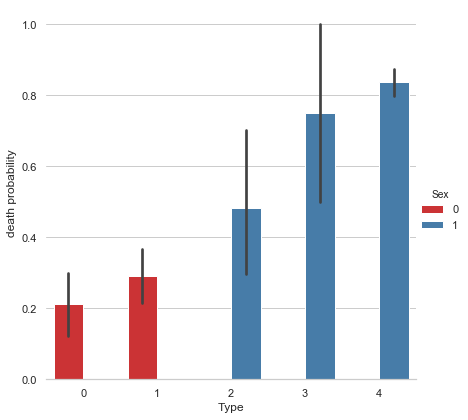

In [25]:
sns.set(style="whitegrid")

g = sns.catplot(x="Type", y="Survived", hue="Sex", data=df, height=6, kind="bar", palette="Set1")
g.despine(left=True)
g.set_ylabels("death probability")

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type
0,1,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,4
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,0
4,5,1,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,4


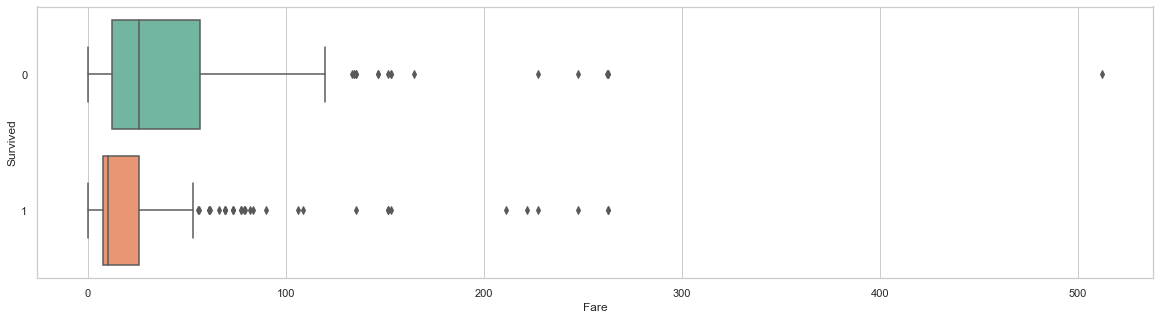

In [27]:
plt.figure(figsize=(20,5))
sns.boxplot(y="Survived", x="Fare", data=df, palette="Set2",  orient="h");

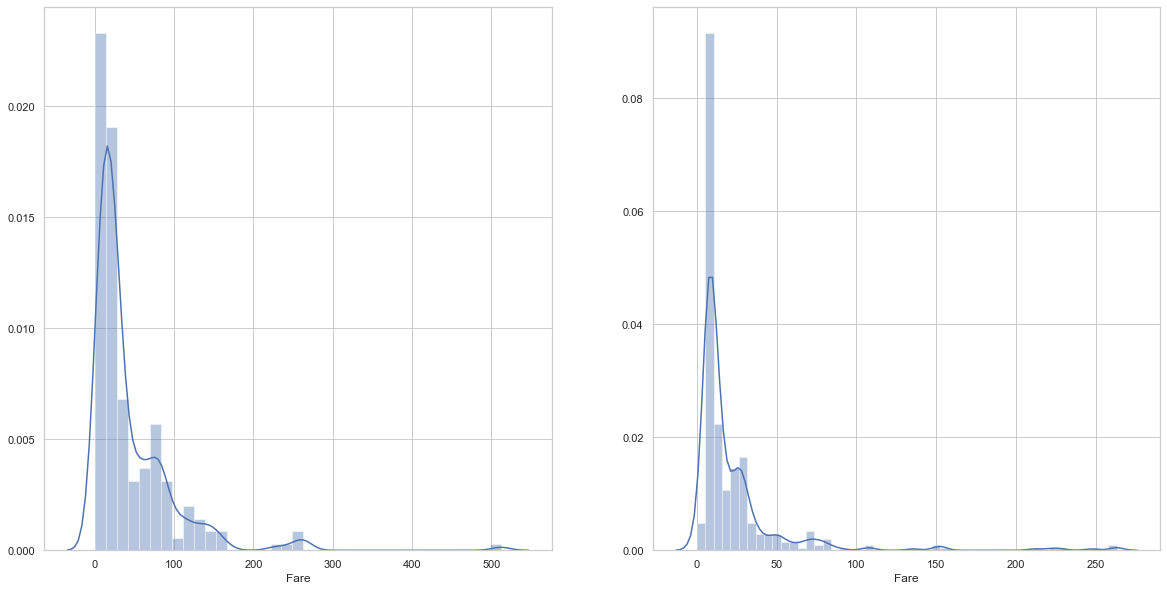

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.distplot(df[df['Survived']==0].Fare,ax=ax[0])
sns.distplot(df[df['Survived']==1].Fare,ax=ax[1])

In [29]:
df.loc[df["Fare"] < 10,"Fare"] = 5
df.loc[(df["Fare"] >= 10) & (df["Fare"] < 25),"Fare"] = 3
df.loc[(df["Fare"] >= 25) & (df["Fare"] < 50),"Fare"] = 4
df.loc[(df["Fare"] >= 50) & (df["Fare"] < 100),"Fare"] = 2
df.loc[(df["Fare"] >= 100), 'Fare'] = 0
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type
0,1,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,5.0,NaN,2,4
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,2.0,C85,0,0
2,3,0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,5.0,NaN,2,1
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,2.0,C123,2,0
4,5,1,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,5.0,NaN,2,4


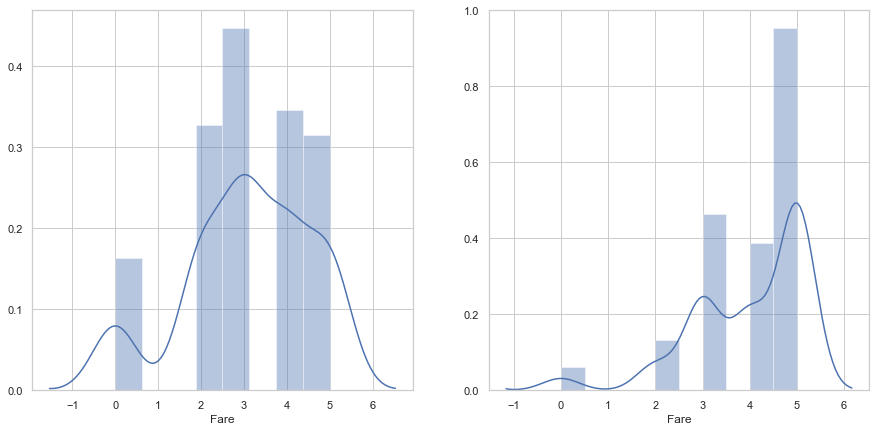

In [30]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.distplot(df[df['Survived']==0].Fare,ax=ax[0])
sns.distplot(df[df['Survived']==1].Fare,ax=ax[1])

In [31]:
pd.crosstab(df.Fare,df.Survived).apply(lambda r: r/r.sum(), axis=1)

Survived,0,1
Fare,,
0.0,0.684211,0.315789
2.0,0.666667,0.333333
3.0,0.438272,0.561728
4.0,0.419847,0.580153
5.0,0.210970,0.789030


In [32]:
df['Fare'] = df['Fare'].astype(int)

In [33]:
df['Age'].isnull().sum()

135

In [34]:
meanAge = df['Age'].mean()
print(meanAge)

29.858610567514678


In [35]:
df['Age'] = df.Age.fillna(meanAge)
df['Age'] = df['Age'].astype('int64')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type
0,1,1,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,5,NaN,2,4
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,2,C85,0,0
2,3,0,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,5,NaN,2,1
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,2,C123,2,0
4,5,1,3,"Allen, Mr. William Henry",1,35,0,0,373450,5,NaN,2,4


In [36]:
df.loc[df["Age"] < 15,"Age"] = 0
df.loc[(df["Age"] >= 15) & (df["Age"] < 30),"Age"] = 3
df.loc[(df["Age"] >= 30) & (df["Age"] < 45),"Age"] = 1
df.loc[(df["Age"] >= 45) & (df["Age"] < 60),"Age"] = 2
df.loc[(df["Age"] >= 60), 'Age'] = 4
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type
0,1,1,3,"Braund, Mr. Owen Harris",1,3,1,0,A/5 21171,5,NaN,2,4
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,2,C85,0,0
2,3,0,3,"Heikkinen, Miss. Laina",0,3,0,0,STON/O2. 3101282,5,NaN,2,1
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,2,C123,2,0
4,5,1,3,"Allen, Mr. William Henry",1,1,0,0,373450,5,NaN,2,4


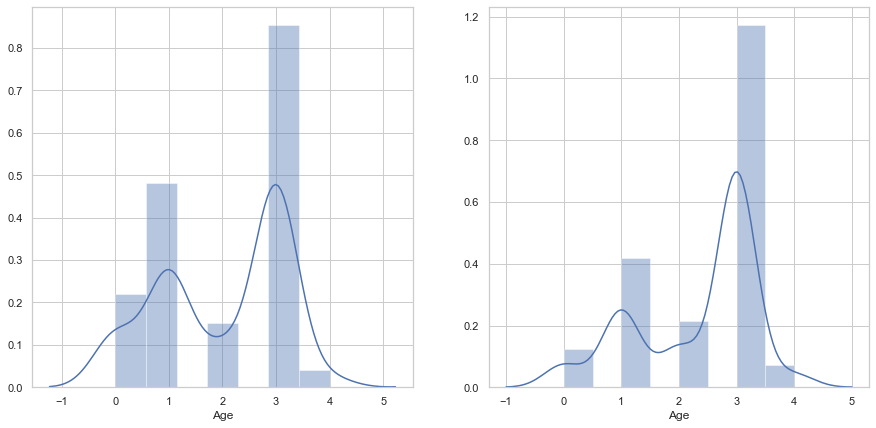

In [37]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.distplot(df[df['Survived']==0].Age,ax=ax[0])
sns.distplot(df[df['Survived']==1].Age,ax=ax[1])

In [38]:
pd.crosstab(df.Age,df.Survived).apply(lambda r: r/r.sum(), axis=1)

Survived,0,1
Age,,
0,0.571429,0.428571
1,0.460526,0.539474
2,0.343750,0.656250
3,0.350282,0.649718
4,0.300000,0.700000


In [39]:
df.Cabin.value_counts()

G6             4
C23 C25 C27    4
F33            3
F2             3
C22 C26        3
              ..
D37            1
B22            1
B50            1
C104           1
D19            1
Name: Cabin, Length: 109, dtype: int64

In [40]:
df.loc[df["Cabin"].str.find('A') >= 0, "Deck"] = 5
df.loc[df["Cabin"].str.find('B') >= 0, "Deck"] = 3
df.loc[df["Cabin"].str.find('C') >= 0, "Deck"] = 4
df.loc[df["Cabin"].str.find('D') >= 0, "Deck"] = 1
df.loc[df["Cabin"].str.find('E') >= 0, "Deck"] = 2
df.loc[df["Cabin"].str.find('F') >= 0, "Deck"] = 0
df.loc[df["Cabin"].str.find('G') >= 0, "Deck"] = 6

In [41]:
df['Deck'] = df.Deck.fillna(6)

In [42]:
df['Deck'] = df['Deck'].astype(int)

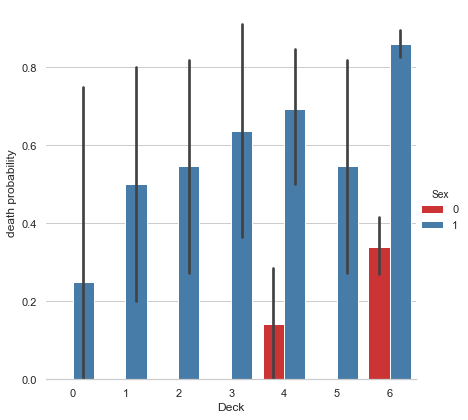

In [43]:
sns.set(style="whitegrid")

g = sns.catplot(x="Deck", y="Survived", hue="Sex", data=df, height=6, kind="bar", palette="Set1")
g.despine(left=True)
g.set_ylabels("death probability")

In [44]:
pd.crosstab(df.Deck,df.Survived).apply(lambda r: r/r.sum(), axis=1)

Survived,0,1
Deck,,
0,0.888889,0.111111
1,0.782609,0.217391
2,0.714286,0.285714
3,0.750000,0.250000
4,0.553191,0.446809
5,0.500000,0.500000
6,0.316206,0.683794


In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type,Deck
0,1,1,3,"Braund, Mr. Owen Harris",1,3,1,0,A/5 21171,5,NaN,2,4,6
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,0,PC 17599,2,C85,0,0,4
2,3,0,3,"Heikkinen, Miss. Laina",0,3,0,0,STON/O2. 3101282,5,NaN,2,1,6
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,2,C123,2,0,4
4,5,1,3,"Allen, Mr. William Henry",1,1,0,0,373450,5,NaN,2,4,6


In [46]:
del df['Name']
del df['Ticket']
del df['Parch']
del df['SibSp']
del df['Cabin']

In [47]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Type,Deck
0,1,1,3,1,3,5,2,4,6
1,2,0,1,0,1,2,0,0,4
2,3,0,3,0,3,5,2,1,6
3,4,0,1,0,1,2,2,0,4
4,5,1,3,1,1,5,2,4,6


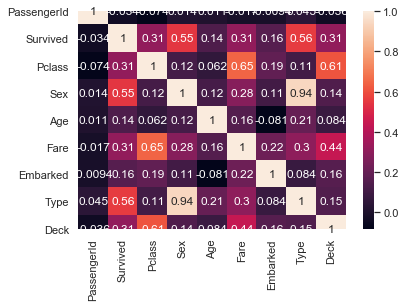

In [48]:
sns.heatmap(df.corr(), annot = True)

In [49]:
df.dtypes


PassengerId    int64
Survived       int64
Pclass         int64
Sex            int64
Age            int64
Fare           int32
Embarked       int32
Type           int32
Deck           int32
dtype: object

In [50]:
y=df["Survived"]
x=df.iloc[:,1:]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=4130)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rdclass=RandomForestClassifier()
rdclass.fit(X_train,y_train)
ypred=rdclass.predict(X_test)

accRFC = accuracy_score(y_test,ypred)
print(accRFC)

1.0


C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
from sklearn import svm
clf = svm.SVR()
clf.fit(X_train,y_train)

ypred = clf.predict(X_test)
accSVM_D = accuracy_score(y_test, ypred.round())
print(accSVM_D)

0.9948453608247423


C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [60]:
val = []
euc = []

for c in range(1,50):
    for eps in range(0,10):
        clf = svm.SVR(C=c, epsilon=(eps/10))
        clf.fit(X_train,y_train)

        ypred = clf.predict(X_test)
        euc.append([c,(eps/10)])
        val.append([accuracy_score(y_test, ypred.round()),c,eps])

accSVM_A = max(val)
accSVM_A = accSVM_A[0]
print(accSVM_A)

C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

0.9948453608247423


C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

In [61]:
max(val)

[0.9948453608247423, 49, 4]

In [62]:
clf = svm.SVR(C=49, epsilon=(4/10))
clf.fit(X_train,y_train)

ypred = clf.predict(X_test)
accuracy_score(y_test, ypred.round())

C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9948453608247423

In [63]:
ypred = pd.DataFrame(ypred)
ypred = pd.Series.round(ypred)
ypred = ypred.astype('int64')
accuracy_score(y_test, ypred.round())

0.9948453608247423

In [64]:
import numpy as np
x_ntest = np.array(X_test)
y_ntest = np.array(y_test)
x_ntrain = np.array(X_train)
y_ntrain = np.array(y_train)

In [65]:
print(x_ntrain.shape, y_ntrain.shape)

(452, 8) (452,)


In [89]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [97]:
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier()

# fit the model with the training data
model.fit(x_ntrain,y_ntrain)

# predict the target on the train dataset
predict_train = model.predict(x_ntrain)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_ntrain,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(x_ntest)


# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_ntest,predict_test)
print('\naccuracy_score on test dataset :', accuracy_test)

accuracy_score on train dataset :  1.0

accuracy_score on test dataset : 1.0


In [98]:
"""
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# make datasets
dtrain = xgb.DMatrix(x_ntrain, label=y_train)
dtest = xgb.DMatrix(x_ntest)

# set up
param = {'max_depth':8, 'eta':0.1, 'objective':'binary:hinge' }
num_round = 10

# fit the model with the training data
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)
preds = preds.astype('int64')

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,preds)
print('accuracy_score on test dataset : ', accuracy_test)
"""

"\nimport xgboost as xgb\nfrom sklearn.model_selection import GridSearchCV\n\n# make datasets\ndtrain = xgb.DMatrix(x_ntrain, label=y_train)\ndtest = xgb.DMatrix(x_ntest)\n\n# set up\nparam = {'max_depth':8, 'eta':0.1, 'objective':'binary:hinge' }\nnum_round = 10\n\n# fit the model with the training data\nbst = xgb.train(param, dtrain, num_round)\n# make prediction\npreds = bst.predict(dtest)\npreds = preds.astype('int64')\n\n# Accuracy Score on test dataset\naccuracy_test = accuracy_score(y_test,preds)\nprint('accuracy_score on test dataset : ', accuracy_test)\n"

accuracy_score on train dataset :  1.0

accuracy_score on test dataset :  1.0


In [113]:
df =  pd.read_csv("test.csv")

df.loc[df["Sex"] == "male","Sex"] = 1
df.loc[df["Sex"] == "female","Sex"] = 0
df['Embarked'] = df.Embarked.fillna('S')
df['Embarked'] = df['Embarked'].map( {'S': 2, 'Q': 1, 'C': 0} ).astype(int)

df.loc[df["Name"].str.find('Mr.') >= 0, "Type"] = 4
df.loc[df["Name"].str.find('Mrs.') >= 0, "Type"] = 0
df.loc[df["Name"].str.find('Miss.') >= 0, "Type"] = 1
df.loc[df["Name"].str.find('Master.') >= 0, "Type"] = 2
df.loc[df["Name"].str.find('Don.') >= 0, "Type"] = 3
df.loc[df["Name"].str.find('Rev.') >= 0, "Type"] = 3
df.loc[df["Name"].str.find('Dr.') >= 0, "Type"] = 3
df['Type'] = df.Type.fillna(3)
df['Type'] = df['Type'].astype(int)

df.loc[df["Fare"] < 10,"Fare"] = 5
df.loc[(df["Fare"] >= 10) & (df["Fare"] < 25),"Fare"] = 3
df.loc[(df["Fare"] >= 25) & (df["Fare"] < 50),"Fare"] = 4
df.loc[(df["Fare"] >= 50) & (df["Fare"] < 100),"Fare"] = 2
df.loc[(df["Fare"] >= 100), 'Fare'] = 0
df['Fare'] = df.Type.fillna(3)
df['Fare'] = df['Fare'].astype(int)

df['Age'] = df.Age.fillna(meanAge)
df['Age'] = df['Age'].astype('int64')

df.loc[df["Age"] < 15,"Age"] = 0
df.loc[(df["Age"] >= 15) & (df["Age"] < 30),"Age"] = 3
df.loc[(df["Age"] >= 30) & (df["Age"] < 45),"Age"] = 1
df.loc[(df["Age"] >= 45) & (df["Age"] < 60),"Age"] = 2
df.loc[(df["Age"] >= 60), 'Age'] = 4

df.loc[df["Cabin"].str.find('A') >= 0, "Deck"] = 5
df.loc[df["Cabin"].str.find('B') >= 0, "Deck"] = 3
df.loc[df["Cabin"].str.find('C') >= 0, "Deck"] = 4
df.loc[df["Cabin"].str.find('D') >= 0, "Deck"] = 1
df.loc[df["Cabin"].str.find('E') >= 0, "Deck"] = 2
df.loc[df["Cabin"].str.find('F') >= 0, "Deck"] = 0
df.loc[df["Cabin"].str.find('G') >= 0, "Deck"] = 6
df['Deck'] = df.Deck.fillna(6)
df['Deck'] = df['Deck'].astype(int)

del df['Name']
del df['Ticket']
del df['Parch']
del df['SibSp']
del df['Cabin']
df.head()


AttributeError: 'DataFrame' object has no attribute 'Embarked'

In [108]:
data = np.array(df)

In [109]:
dfinal = model.predict(data)   ##XGBoost

ValueError: could not convert string to float: 'S'

In [110]:
preds = dfinal
preds = preds.astype('int64')
preds

NameError: name 'dfinal' is not defined

In [111]:
preds[preds == 1] = 2
preds[preds == 0] = 1
preds[preds == 2] = 0
preds

NameError: name 'preds' is not defined

In [101]:
my_submission = pd.DataFrame({'PassengerId': df.index, 'Survived': preds})


my_submission.to_csv('submission.csv', index=False)


NameError: name 'preds' is not defined

In [80]:
my_submission.head(20)

NameError: name 'my_submission' is not defined